In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [4]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [5]:
import os

base_dir = './data/conv-dogs-cats-small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
for data_batch, labels_batch in train_generator:
    print('data batch:', data_batch.shape)
    print('labels batch:', labels_batch.shape)
    break

('data batch:', (20, 150, 150, 3))
('labels batch:', (20,))


In [9]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 202s - loss: 0.6862 - acc: 0.5445 - val_loss: 0.6653 - val_acc: 0.6060
Epoch 2/30
100/100 [==============================] - 212s - loss: 0.6557 - acc: 0.6120 - val_loss: 0.6335 - val_acc: 0.6570
Epoch 3/30
100/100 [==============================] - 182s - loss: 0.5992 - acc: 0.6860 - val_loss: 0.6082 - val_acc: 0.6650
Epoch 4/30
100/100 [==============================] - 185s - loss: 0.5601 - acc: 0.7010 - val_loss: 0.5801 - val_acc: 0.6890
Epoch 5/30
100/100 [==============================] - 219s - loss: 0.5328 - acc: 0.7360 - val_loss: 0.5908 - val_acc: 0.6890
Epoch 6/30
100/100 [==============================] - 187s - loss: 0.5182 - acc: 0.7455 - val_loss: 0.5731 - val_acc: 0.6980
Epoch 7/30
100/100 [==============================] - 202s - loss: 0.4905 - acc: 0.7630 - val_loss: 0.5788 - val_acc: 0.6890
Epoch 8/30
100/100 [==============================] - 215s - loss: 0.4555 - acc: 0.7880 - val_loss: 0.6161 - val_acc: 0.6610


In [20]:
model.save('saved_models/cats_and_dogs_small_1.h5')

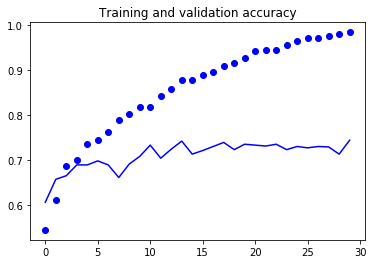

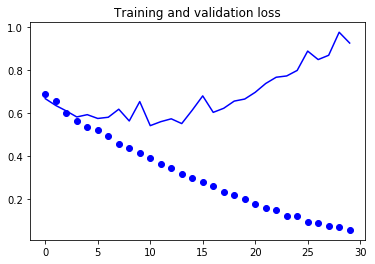

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')

plt.show()

In [25]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=62,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=31)

Epoch 1/100
62/62 [==============================] - 261s - loss: 0.5654 - acc: 0.7052 - val_loss: 0.5100 - val_acc: 0.7438
Epoch 2/100
62/62 [==============================] - 198s - loss: 0.5453 - acc: 0.7243 - val_loss: 0.5024 - val_acc: 0.7583
Epoch 3/100
62/62 [==============================] - 200s - loss: 0.5421 - acc: 0.7102 - val_loss: 0.4889 - val_acc: 0.7531
Epoch 4/100
62/62 [==============================] - 195s - loss: 0.5479 - acc: 0.7223 - val_loss: 0.5266 - val_acc: 0.7510
Epoch 5/100
62/62 [==============================] - 170s - loss: 0.5426 - acc: 0.7349 - val_loss: 0.5092 - val_acc: 0.7531
Epoch 6/100
62/62 [==============================] - 194s - loss: 0.5351 - acc: 0.7303 - val_loss: 0.5014 - val_acc: 0.7386
Epoch 7/100
62/62 [==============================] - 171s - loss: 0.5241 - acc: 0.7334 - val_loss: 0.4978 - val_acc: 0.7541
Epoch 8/100
62/62 [==============================] - 182s - loss: 0.5157 - acc: 0.7465 - val_loss: 0.5227 - val_acc: 0.7314
Epoch 9/

62/62 [==============================] - 166s - loss: 0.4152 - acc: 0.8105 - val_loss: 0.4446 - val_acc: 0.7779
Epoch 67/100
62/62 [==============================] - 166s - loss: 0.3904 - acc: 0.8241 - val_loss: 0.4093 - val_acc: 0.8285
Epoch 68/100
62/62 [==============================] - 165s - loss: 0.4027 - acc: 0.8100 - val_loss: 0.4044 - val_acc: 0.8182
Epoch 69/100
62/62 [==============================] - 165s - loss: 0.4072 - acc: 0.8150 - val_loss: 0.5065 - val_acc: 0.7459
Epoch 70/100
62/62 [==============================] - 165s - loss: 0.3988 - acc: 0.8221 - val_loss: 0.3983 - val_acc: 0.8316
Epoch 71/100
62/62 [==============================] - 167s - loss: 0.4115 - acc: 0.8100 - val_loss: 0.3997 - val_acc: 0.8140
Epoch 72/100
62/62 [==============================] - 167s - loss: 0.3834 - acc: 0.8337 - val_loss: 0.4567 - val_acc: 0.7934
Epoch 73/100
62/62 [==============================] - 169s - loss: 0.4024 - acc: 0.8221 - val_loss: 0.4143 - val_acc: 0.8202
Epoch 74/100


In [28]:
model.save('saved_models/cats_and_dogs_small_2.h5')

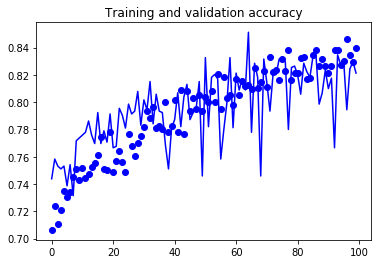

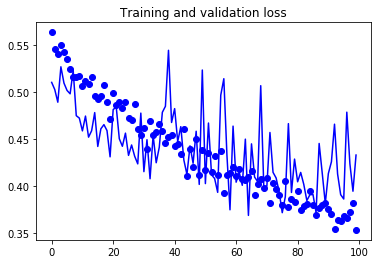

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')

plt.show()